# Generate 2d Computational Space (Occupancy Grid)

In [387]:
import numpy as np

def add_obstacle(occupancy_grid, width, length, x, y):
    width_occ_grid = len(occupancy_grid[0])
    height_occ_grid = len(occupancy_grid)

    start_row = y
    end_row = min(height_occ_grid, y + length)
    start_col = x
    end_col = min(width_occ_grid, x + width)

    for row in range(start_row, end_row):
        for col in range(start_col, end_col):
            occupancy_grid[row][col] = False

    return occupancy_grid

def generate_empty_occupancy_grid(size):
    empty_occupancy_grid = np.ones((size, size), dtype=bool)

    # Add obstacles for 2d computational space

    #occupancy_grid = add_obstacle(occupancy_grid, 5, 2, 7, 14)
    #occupancy_grid = add_obstacle(occupancy_grid, 4, 3, 12, 4)
    #occupancy_grid = add_obstacle(occupancy_grid, 4, 2, 15, 10)

    return empty_occupancy_grid

In [2]:
def calculate_computational_space_rotated_180(occupancy_grid, robot_width, robot_length):
    width = len(occupancy_grid[0])
    height = len(occupancy_grid)

    computational_space = [[True for _ in range(width)] for _ in range(height)]

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_length)
                start_col = max(0, col - robot_width + 1)
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle Zeilen bis robot_length - 1 auf False setzen
    for row in range(robot_length - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle Spalten bis width-robot_width auf False setzen
    for col in range(width - robot_width + 1, width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


# Beispielaufruf
occupancy_grid = [
    [True, True, True, True, True],
    [True, False, True, True, True],
    [True, True, True, True, True],
    [True, True, True, False, True],
    [True, True, True, True, True]
]

robot_width = 2
robot_length = 3

computational_space_rotated_180 = calculate_computational_space_rotated_180(occupancy_grid, robot_width, robot_length)

# Ausgabe des berechneten Computational Space für die Drehung um 180°
for row in computational_space_rotated_180:
    print(row)


[False, False, False, False, False]
[False, False, False, False, False]
[False, False, True, True, False]
[False, False, False, False, False]
[True, True, False, False, False]


# Compute Computational Space for Robot Rotations

In [3]:
def compute_cs_0deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = max(0, row - (robot_length - 1))
                end_row = min(height, row + 1)
                start_col = max(0, col - (robot_width - 1))
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle Zeilen bis height-robot_length auf False setzen
    for row in range(height - robot_length + 1, height):
        for col in range(width):
            computational_space[row][col] = False

    # Alle Spalten bis width-robot_width auf False setzen
    for col in range(width - robot_width + 1, width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


def compute_cs_90deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_width)
                start_col = max(0, col - robot_length + 1)
                end_col = min(width, col + 1)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle oberen (robot_width-1) Zeilen auf False setzen
    for row in range(robot_width - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle rechten (robot_length-1) Spalten auf False setzen
    for col in range((width - robot_length + 1), width):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space


def compute_cs_180deg(occupancy_grid, robot_width, robot_length):
    width = len(occupancy_grid[0])
    height = len(occupancy_grid)

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = row
                end_row = min(height, row + robot_length)
                start_col = col
                end_col = min(width, col + robot_width)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle oberen (robot_length-1) Zeilen auf False setzen
    for row in range(robot_length - 1):
        for col in range(width):
            computational_space[row][col] = False

    # Alle linken (robot_width-1) Spalten auf False setzen
    for col in range(robot_width - 1):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space



def compute_cs_270deg(occupancy_grid, robot_width, robot_length):
    height = len(occupancy_grid)
    width = len(occupancy_grid[0])

    computational_space = np.full((height, width), True)

    for row in range(height):
        for col in range(width):
            if not occupancy_grid[row][col]:
                # Koordinaten im quadratischen Bereich um das Hindernis auf False setzen
                start_row = max(0, row - robot_width + 1)
                end_row = min(height, row + 1)
                start_col = col
                end_col = min(width, col + robot_length)

                for i in range(start_row, end_row):
                    for j in range(start_col, end_col):
                        computational_space[i][j] = False

    # Alle unteren (robot_width-1) Zeilen auf False setzen
    for row in range((height - robot_width + 1), height):
        for col in range(width):
            computational_space[row][col] = False

    # Alle linken (robot_length-1) Spalten auf False setzen
    for col in range(robot_length - 1):
        for row in range(height):
            computational_space[row][col] = False

    return computational_space

# Compute Potentials

In [4]:
import numpy as np

def compute_potential_field(cs_plane, goal, attraction_weight=0.07, repulsion_weight=0):
    size_x = cs_plane.shape[0]
    size_y = cs_plane.shape[1]
    attraction_potential = np.zeros((size_x, size_y))
    repulsion_potential = np.zeros((size_x, size_y))

    for x in range(size_x):
        for y in range(size_y):
            # Abstand zum Ziel
            distance_to_goal = np.sqrt((x - goal[0])**2 + (y - goal[1])**2)

            # Anziehendes Potential zum Ziel (Quadratische Funktion)
            attraction_potential[y, x] = attraction_weight * distance_to_goal**2
            #attraction_potential[y, x] = distance_to_goal

            #max_value = np.max(attraction_potential)
            normalized_attraction_potential = attraction_potential #/ max_value


            # Abstand zu Hindernissen
            distance_to_obstacles = np.min(np.sqrt((y - np.where(cs_plane == False)[0])**2 +
                                                   (x - np.where(cs_plane == False)[1])**2))

            # Abstoßendes Potential von Hindernissen
            repulsion_potential[y, x] = 1 / (repulsion_weight + distance_to_obstacles) if distance_to_obstacles > 0 else 2

    return normalized_attraction_potential, repulsion_potential

def compute_total_potential(attraction_potential, repulsion_potential):
    total_potential = attraction_potential + repulsion_potential
    return total_potential

# Gradient Descent Step

In [503]:
import numpy as np

def get_lowest_pot_in_neighbourhood(total_potential_plane, current_position):

    height = len(total_potential_plane)
    width = len(total_potential_plane[0])

    current_x, current_y, _ = current_position

    neighbors = []

    if current_y != 0:
        neighbors.append(((current_x, current_y - 1), total_potential_plane[current_y - 1, current_x]))  # top neighbour
    if current_y != (height - 1):
        neighbors.append(((current_x, current_y + 1), total_potential_plane[current_y + 1, current_x]))  # bottom neighbour
    if current_x != 0:
        neighbors.append(((current_x - 1, current_y), total_potential_plane[current_y, current_x - 1]))  # left neighbour
    if current_x != (width - 1):
        neighbors.append(((current_x + 1, current_y), total_potential_plane[current_y, current_x + 1]))  # right neighbour

    # Finde die Position mit dem kleinsten Gesamtpotential
    lowest_pot_neighbour = min(neighbors, key=lambda x: x[1])
    lowest_pot_position, lowest_pot_in_neighbourhood = lowest_pot_neighbour

    # TODO: Implement obstacle detection

    return lowest_pot_in_neighbourhood, lowest_pot_position


def gradient_descent_step(total_potentials, occupancy_grids, current_position):

    # [total_potential_0deg, total_potential_90deg, total_potential_180deg, total_potential_270deg] = total_potentials

    new_current_position = current_position

    current_x, current_y, current_rotation = current_position
    total_potential_plane_current_rotation = total_potentials[current_rotation]

    # Get lowest potential when translating (current rotation plane only)
    lowest_pot_in_neighbourhood, lowest_pot_neighbour_position = get_lowest_pot_in_neighbourhood(total_potential_plane_current_rotation, current_position)
    lowest_pot_neighbour_position_x, lowest_pot_neighbour_position_y = lowest_pot_neighbour_position

    print("Pot of lowest neigbour (" + str(lowest_pot_neighbour_position) + "): " + str(lowest_pot_in_neighbourhood))
    occupancy_grid_current_rotation = occupancy_grids[current_rotation]
    if not occupancy_grid_current_rotation[lowest_pot_neighbour_position_y, lowest_pot_neighbour_position_x]:
        # Obstacle!
        print("Obstacle at lowest pot neighbour: " + str(lowest_pot_neighbour_position_y, lowest_pot_neighbour_position_x))
        lowest_pot_in_neighbourhood = None


    # Get potentials when rotating (switching planes, no translation)
    reachable_rotation_counter_clockwise = (current_position[2] + 1) % 4
    reachable_rotation_clockwise = (current_position[2] + 3) % 4

    # Counter clockwise rotation:
    total_potential_plane_rotation_counter_clockwise = total_potentials[reachable_rotation_counter_clockwise]
    pot_rotation_counter_clockwise = total_potential_plane_rotation_counter_clockwise[current_y][current_x]

    print("Pot at counter clockwise Rotation " + str(reachable_rotation_counter_clockwise*90) + ": " + str(pot_rotation_counter_clockwise))
    occupancy_grid_counter_clockwise = occupancy_grids[reachable_rotation_counter_clockwise]
    if not occupancy_grid_counter_clockwise[current_y, current_x]:
        # Obstacle!
        print("Obstacle at counter clockwise rotation: " + str(reachable_rotation_counter_clockwise))
        pot_rotation_counter_clockwise = None

    # Clockwise rotation:
    total_potential_plane_rotation_clockwise = total_potentials[reachable_rotation_clockwise]
    pot_rotation_clockwise = total_potential_plane_rotation_clockwise[current_y][current_x]

    print("Pot at clockwise Rotation " + str(reachable_rotation_clockwise) + ": " + str(pot_rotation_clockwise))
    occupancy_grid_clockwise = occupancy_grids[reachable_rotation_clockwise]
    if not occupancy_grid_clockwise[current_y, current_x]:
        # Obstacle!
        print("Obstacle at clockwise rotation " + str(reachable_rotation_clockwise))
        pot_rotation_clockwise = None
   

    actions = []

    if lowest_pot_in_neighbourhood is not None:
        actions.append((lowest_pot_in_neighbourhood, lambda: (
            lowest_pot_neighbour_position_x,
            lowest_pot_neighbour_position_y,
            current_rotation
        )))

    if pot_rotation_counter_clockwise is not None:
        actions.append((pot_rotation_counter_clockwise, lambda: (
            current_x, current_y, reachable_rotation_counter_clockwise
        )))

    if pot_rotation_clockwise is not None:
        actions.append((pot_rotation_clockwise, lambda: (
            current_x, current_y, reachable_rotation_clockwise
        )))

    if actions:
        min_potential, update_function = min(actions, key=lambda x: x[0])
        new_current_position = update_function()
    else:
        print("LOCAL MINIMUM!")

    print("New current position: " + str(new_current_position))
    return new_current_position


# Plot Occupancy Grid

In [504]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_occupancy_grid(occupancy_grid, goal_point, current_position, plot_axis, path=[], robot_width=None, robot_length=None, active=True, plot_title="Occupancy Grid", y_axis_label=None, start_point=None):
    plot_axis.clear()

    if active:
        cmap = ListedColormap(['darkblue', 'white'])        
        start_color = 'green'
        goal_color = 'red'
        path_color = 'blue'
        current_color = 'orange'
    else:
        cmap = 'gray'
        start_color = 'black'
        goal_color = 'dimgray'
        path_color = 'darkgray'
        current_color = 'gray'
        line_color = 'black'

    current_x, current_y, current_rotation = current_position

    plot_axis.imshow(occupancy_grid, cmap=cmap, interpolation='nearest', origin='upper')
    if start_point is not None:
        plot_axis.scatter(start_point[0], start_point[1], color=start_color, marker='o', label='Start Point')
    plot_axis.scatter(goal_point[0], goal_point[1], color=goal_color, marker='o', label='Goal Point')
    plot_axis.plot([p[0] for p in path], [p[1] for p in path], color=path_color, label='Chosen Path')

    if robot_width is None or robot_length is None:
        # Darstellung des aktuellen Roboters als x
        if not occupancy_grid[current_y, current_x]:
            plot_axis.scatter(current_x, current_y, color=current_color, marker='x', label='Current Position')
        else:
            plot_axis.scatter(current_x, current_y, color=current_color, marker='o', label='Current Position')
            # Darstellung des aktuellen Roboters als Rechteck
    else:
        current_rect = plt.Rectangle(
            (current_x - 0.5, current_y - 0.5),
            robot_width,
            robot_length,
            rotation_point=(current_x, current_y),
            angle=current_rotation * -90,  # Rotation in Grad umrechnen
            color=current_color,
            label='Current Position'
        )
        plot_axis.add_patch(current_rect)

    plot_axis.grid(False)
    plot_axis.set_title(plot_title)

    # Beschriftung der X-Achse oben
    plot_axis.xaxis.tick_top()

    if y_axis_label is not None:
        # Optionale Beschriftung Y-Achse
        plot_axis.text(-0.15, 0.5, y_axis_label, rotation='horizontal', va='center', ha='right', transform=plot_axis.transAxes)


    # Legende unter das Bild in die Mitte verschieben
    #cs_2d_plot_axis.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)



# Plot Potential 3D

In [505]:
import numpy as np

def plot_potential_3D(potential_plane, goal_point, path, current_position, plot_axis, plot_title, occupancy_grid, start_point=None, active=True):
    # Clear previous plots
    plot_axis.clear()

    if active:
        cmap = 'viridis'
        start_color = 'green'
        goal_color = 'red'
        path_color = 'blue'
        current_color = 'orange'
        line_color = 'black'
    else:
        cmap = 'gray'
        start_color = 'black'
        goal_color = 'dimgray'
        path_color = 'darkgray'
        current_color = 'gray'
        line_color = 'black'

    # Repulsion Potential as z-axis in 3D Plane
    x, y = np.meshgrid(np.arange(potential_plane.shape[0]), np.arange(potential_plane.shape[1]))
    z = potential_plane
    plot_axis.plot_surface(x, y, z, cmap=cmap, rstride=1, cstride=1, alpha=0.6, linewidth=0.5, antialiased=True)

    if start_point is not None:
        # Start Point
        pot_start_point = potential_plane[start_point[1]][start_point[0]]
        plot_axis.scatter(start_point[0], start_point[1], pot_start_point, color=start_color, marker='o', label='Start Point')

    # Goal Point
    pot_goal_point = potential_plane[goal_point[1]][goal_point[0]]
    plot_axis.scatter(goal_point[0], goal_point[1], pot_goal_point, color=goal_color, marker='o', label='Goal Point')

    # Travelled Path
    plot_axis.plot([p[0] for p in path], [p[1] for p in path], [potential_plane[p[1], p[0]] for p in path], color=path_color, label='Weg')

    # Current Position
    current_x, current_y, current_rotation = current_position
    pot_current_position = potential_plane[current_y][current_x]
    if not occupancy_grid[current_y, current_x]:
        plot_axis.scatter(current_position[0], current_position[1], pot_current_position, color=current_color, marker='x', label='Current Position')
    else:
        plot_axis.scatter(current_position[0], current_position[1], pot_current_position, color=current_color, marker='o', label='Current Position')


    # Set labels and title
    plot_axis.set_xlabel('X')
    plot_axis.set_ylabel('Y')
    plot_axis.set_zlabel('Potential')
    plot_axis.set_title(plot_title)
    plot_axis.invert_yaxis()


# Robot Parameters

In [506]:
# Robotermaße
robot_width = 1
robot_length = 2

# Start- und Zielpunkt festlegen
start_point = (0, 3)
goal_point = (4, 0)
start_rotation = 0 # 0° rotation
current_position=(start_point[0], start_point[1], int((start_rotation/90)))

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(5)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=4,
    length=1,
    x=0,
    y=1)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=2,
    length=1,
    x=1,
    y=3)

# Plot Computational Spaces

In [507]:
%matplotlib widget
import matplotlib.pyplot as plt

def plot_computational_spaces(computational_spaces, attraction_potentials, repulsion_potentials, total_potentials, start_point, goal_point, current_position, axes):

    for rotation in range(4):

        if rotation == current_position[2]:
            active = True
        else:
            active = False
        
        ax_occupancy_grid = axes[0 + rotation*4]
        plot_occupancy_grid(
            occupancy_grid=computational_spaces[rotation],
            #start_point=start_point,
            goal_point=goal_point,
            current_position=current_position,
            plot_axis=ax_occupancy_grid,
            plot_title="",
            active=active,
            y_axis_label=str(rotation*90) + "°"
        )

        ax_attr_pot = axes[1 + rotation*4]
        plot_potential_3D(
            potential_plane=attraction_potentials[rotation],
            occupancy_grid=computational_spaces[rotation],
            goal_point=goal_point,
            path=[],
            current_position=current_position,
            plot_axis=ax_attr_pot,
            plot_title=("Attraction Potential" if rotation == 0 else ""),
            active=active)


        ax_repul_pot = axes[2 + rotation*4]
        plot_potential_3D(
            potential_plane=repulsion_potentials[rotation],
            occupancy_grid=computational_spaces[rotation],
            goal_point=goal_point,
            path=[],
            current_position=current_position,
            plot_axis=ax_repul_pot,
            plot_title=("Repulsion Potential" if rotation == 0 else ""),
            active=active)


        ax_total_pot = axes[3 + rotation*4]
        plot_potential_3D(
            potential_plane=total_potentials[rotation],
            occupancy_grid=computational_spaces[rotation],
            goal_point=goal_point,
            path=[],
            current_position=current_position,
            plot_axis=ax_total_pot,
            plot_title=("Total Potential" if rotation == 0 else ""),
            active=active)


# Compute Computational Spaces

In [508]:
computational_spaces = np.empty(4, dtype=object)
computational_spaces[0] = compute_cs_0deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length)
computational_spaces[1] = compute_cs_90deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length)
computational_spaces[2] = compute_cs_180deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length)
computational_spaces[3] = compute_cs_270deg(
                    occupancy_grid=occupancy_grid,
                    robot_width=robot_width,
                    robot_length=robot_length)

attraction_potentials = np.empty(4, dtype=object)
repulsion_potentials = np.empty(4, dtype=object)
total_potentials = np.empty(4, dtype=object)

for rotation in range(4):
    attraction_potential, repulsion_potential = compute_potential_field(
                                                    cs_plane=computational_spaces[rotation],
                                                    goal=goal_point)
    total_potential = compute_total_potential(attraction_potential, repulsion_potential)
    attraction_potentials[rotation] = attraction_potential
    repulsion_potentials[rotation] = repulsion_potential
    total_potentials[rotation] = total_potential

# Visualize

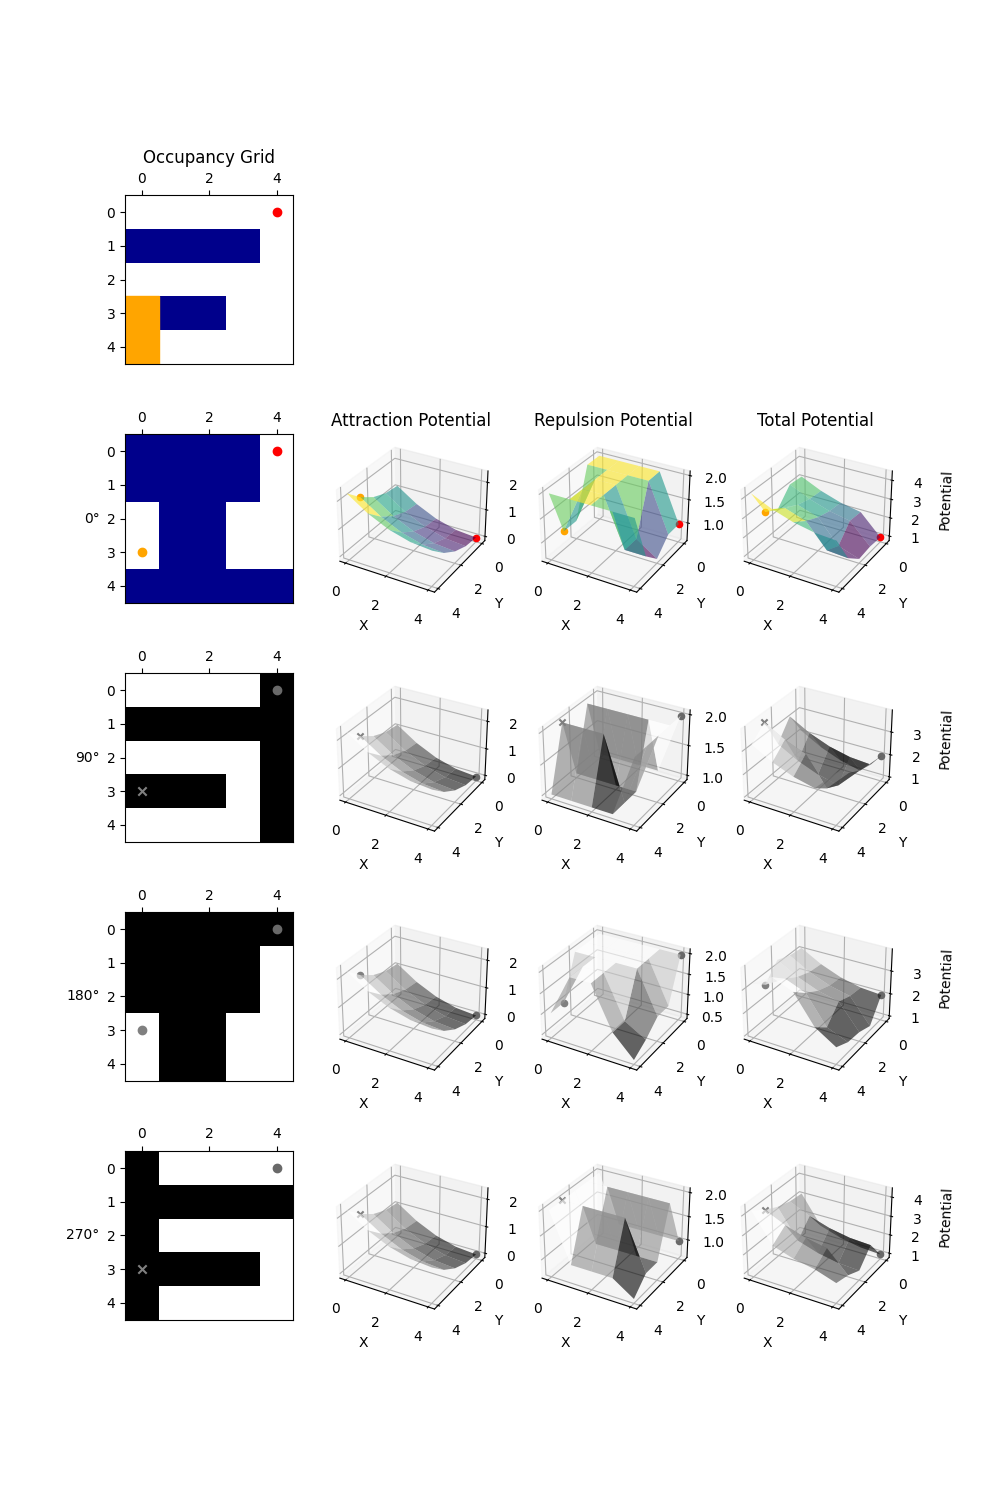

Pot of lowest neigbour ((0, 2)): 2.4000000000000004
Pot at counter clockwise Rotation 90: 3.75
Obstacle at counter clockwise rotation: 1
Pot at clockwise Rotation 3: 3.75
Obstacle at clockwise rotation 3
New current position: (0, 2, 0)
Pot of lowest neigbour ((0, 3)): 2.75
Pot at counter clockwise Rotation 90: 2.4000000000000004
Pot at clockwise Rotation 3: 3.4000000000000004
Obstacle at clockwise rotation 3
New current position: (0, 2, 2.4000000000000004)


In [509]:
fig = plt.figure(figsize=(10, 15))

axes = []

for rotation in range(4):
    for plot in range(1,5):
        if plot == 1 : 
            axes.append(fig.add_subplot(5, 4, plot + rotation*4 + 4)) # occupancy grid
        else: 
            axes.append(fig.add_subplot(5, 4, plot + rotation*4 + 4, projection='3d')) # 3D potentials 

ax_occupancy_grid = fig.add_subplot(5, 4, 1)

def on_key(event):
    global current_position, path
    current_position = gradient_descent_step(total_potentials, computational_spaces, current_position)  
    plot_occupancy_grid(
        occupancy_grid=occupancy_grid,
        start_point=start_point,
        goal_point=goal_point,
        current_position=current_position,
        robot_width=robot_width,
        robot_length=robot_length,
        plot_axis=ax_occupancy_grid
    ) 
    plot_computational_spaces(computational_spaces, attraction_potentials, repulsion_potentials, total_potentials, start_point, goal_point, current_position, axes)
    # path.append(tuple(current_position))
    plt.draw()
    
plot_occupancy_grid(
    occupancy_grid=occupancy_grid,
    start_point=start_point,
    goal_point=goal_point,
    current_position=current_position,
    robot_width=robot_width,
    robot_length=robot_length,
    plot_axis=ax_occupancy_grid
) 
plot_computational_spaces(computational_spaces, attraction_potentials, repulsion_potentials, total_potentials, start_point, goal_point, current_position, axes)

# Verbinde die Tasten mit der Funktion on_key
fig.canvas.mpl_connect('key_press_event', on_key)

plt.show()